In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
cars = pd.read_csv('usedcars.csv')
cars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [4]:
#Price and mileage are two continuous variables ---> let us find the co-relation between them 

In [5]:
cars[['price','mileage']].corr()

,price,mileage
price,1.000000,-0.806149
mileage,-0.806149,1.000000


In [6]:
# As the mileage increases, price decreases

In [7]:
# As the price is increasing, mileage ------> price and mileage are highly co-related -----> -ve ly co-related

# As the mileage increase, price decreases 

In [8]:
X = cars[['mileage']]
y = cars['price']

In [9]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.6498767973014383

In [10]:
cars = pd.get_dummies(data=cars,columns=['model'],drop_first=True,dtype='int32')
cars

,year,price,mileage,color,transmission,model_SEL,model_SES
0,2011,21992,7413,Yellow,AUTO,1,0
1,2011,20995,10926,Gray,AUTO,1,0
2,2011,19995,7351,Silver,AUTO,1,0
3,2011,17809,11613,Gray,AUTO,1,0
4,2012,17500,8367,White,AUTO,0,0
...,...,...,...,...,...,...,...
145,2006,6200,95000,Silver,AUTO,0,1
146,2002,5995,87003,Red,AUTO,0,0
147,2000,5980,96841,Red,AUTO,0,0
148,2001,4899,151479,Yellow,AUTO,0,0


In [51]:
# adding extra features
X = cars[['mileage','model_SEL','model_SES']]
y = cars['price']

In [52]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.7100830292671331

In [53]:
y_predict = model.predict(X)

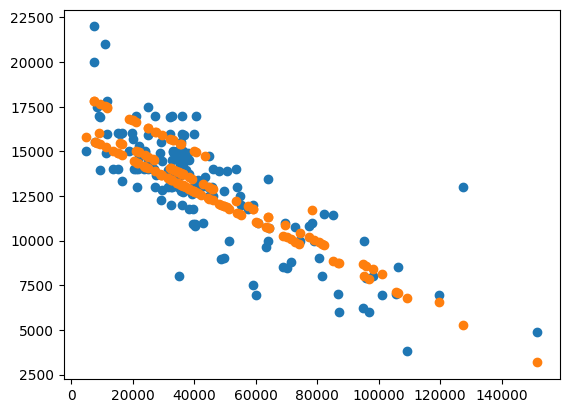

In [54]:
plt.scatter(x='mileage',y='price',data=cars)
plt.scatter(x=cars.mileage,y=y_predict)

In [55]:
#linear

In [64]:
#prediction with only test data-------> still linear lines are found 

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)
X_train.shape,X_test.shape

((120, 3), (30, 3))

In [58]:
#we are splitting the data, W's will be learnt based on this one 
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.7065829089949356, 0.6930060707124146)

In [59]:
w,b=model.coef_,model.intercept_
w,b

(array([-8.71398507e-02,  1.88213412e+03,  6.06337612e+02]),
 16300.822449783127)

In [60]:
y_predict = X_test.dot(w)+b
y_predict

87     12421.530576
111    13174.611696
10     14650.394160
91     12915.022081
49     15098.728692
60     14408.057752
72     15083.043519
67     12102.947281
39     15327.906017
55     15120.861731
66     13060.527101
142    11058.401891
53     14228.201101
1      17230.866559
19     15388.468695
112    10858.347324
85     12810.174310
38     13777.688072
21     14702.329511
35     15304.204460
102    13152.982483
132     7049.097360
126     9842.975253
24     16438.503897
61     14579.131810
2      17542.391525
95     11962.390702
90     13936.195461
76     11325.416924
117    12786.472270
dtype: float64

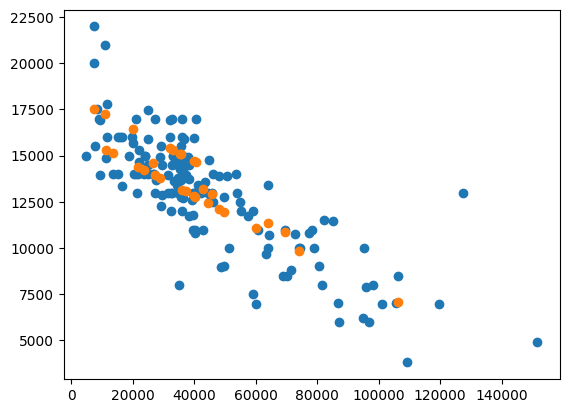

In [61]:
#Drawing the plot
plt.scatter(x='mileage',y='price',data=cars)
plt.scatter(x=X_test.mileage,y=y_predict)
plt.show()

In [16]:
# adding extra features-------------------->#because of addition of year---->linear model has been changed
X = cars[['mileage','model_SEL','model_SES','year']]
y = cars['price']

In [17]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8231774174493128

In [18]:
y_predict = model.predict(X)

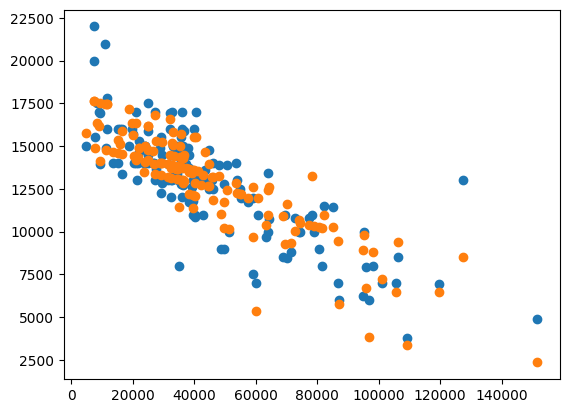

In [19]:
plt.scatter(x='mileage',y='price',data=cars)
plt.scatter(x=cars.mileage,y=y_predict)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [21]:
#we are splitting the data, W's will be learnt based on this one 
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8256194430815232, 0.7811218793840303)

In [22]:
w,b=model.coef_,model.intercept_
w,b

(array([-3.55187974e-02,  1.70031639e+03,  5.77006394e+02,  8.21206944e+02]),
 -1635537.4011132289)

Prediction must be done using TEST data only

In [29]:
#X_test Data prediction:

#1)Manual Prediction
X_test.mileage*w[0]+X_test.model_SEL*w[1]+w[2]*X_test.model_SES+w[3]*X_test.year+b

87     12686.124519
111    13322.944568
10     15348.977151
91     13217.134070
49     14710.514419
60     14317.053488
72     15525.327980
67     13377.474740
39     14691.989914
55     14607.597251
66     13767.790805
142     4739.641471
53     13422.535746
1      17222.002243
19     16471.028309
112     9093.991635
85     13665.745300
38     14060.110508
21     15370.146354
35     15615.474688
102    12984.269304
132     9675.077157
126    10813.880840
24     15256.615929
61     14716.643489
2      17348.981944
95     11677.769031
90     13303.512256
76     12569.200168
117    12013.670298
dtype: float64

In [27]:
#X_test Data prediction:

#2) Prediction using  model.predict --------------------> Gives a numpy arrayA
y_predict = model.predict(X_test)
y_predict 

array([12686.12451893, 13322.94456758, 15348.97715085, 13217.13407006,
       14710.51441909, 14317.05348819, 15525.32798004, 13377.47474004,
       14691.98991376, 14607.59725109, 13767.79080489,  4739.64147059,
       13422.53574584, 17222.00224332, 16471.02830947,  9093.99163545,
       13665.7452999 , 14060.11050765, 15370.14635411, 15615.47468789,
       12984.26930447,  9675.07715712, 10813.88084   , 15256.61592943,
       14716.64348887, 17348.9819441 , 11677.76903085, 13303.51225568,
       12569.20016753, 12013.67029805])

In [30]:
#X_test Data prediction:

#3) Prediction using  .dot product ------------> Gives a series object 

In [32]:
y_predict = X_test.dot(w)+b
y_predict

87     12686.124519
111    13322.944568
10     15348.977151
91     13217.134070
49     14710.514419
60     14317.053488
72     15525.327980
67     13377.474740
39     14691.989914
55     14607.597251
66     13767.790805
142     4739.641471
53     13422.535746
1      17222.002243
19     16471.028309
112     9093.991635
85     13665.745300
38     14060.110508
21     15370.146354
35     15615.474688
102    12984.269304
132     9675.077157
126    10813.880840
24     15256.615929
61     14716.643489
2      17348.981944
95     11677.769031
90     13303.512256
76     12569.200168
117    12013.670298
dtype: float64

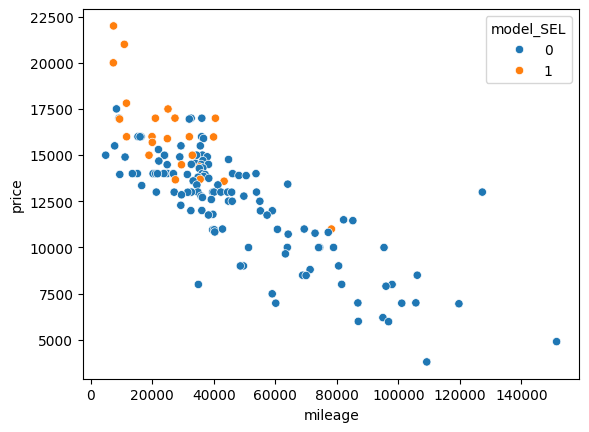

In [36]:
sns.scatterplot(x='mileage',y='price',data=cars,hue='model_SEL')
plt.show()

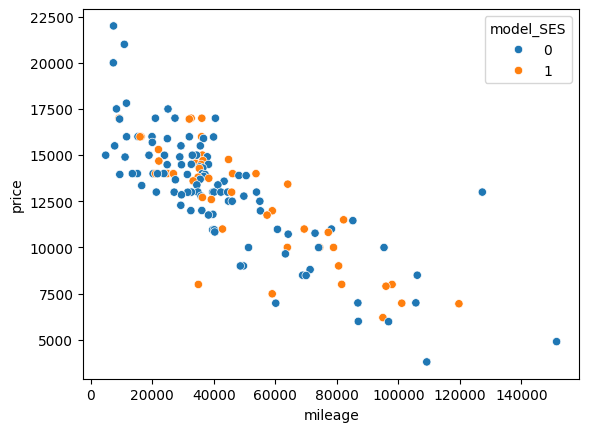

In [37]:
sns.scatterplot(x='mileage',y='price',data=cars,hue='model_SES')
plt.show()

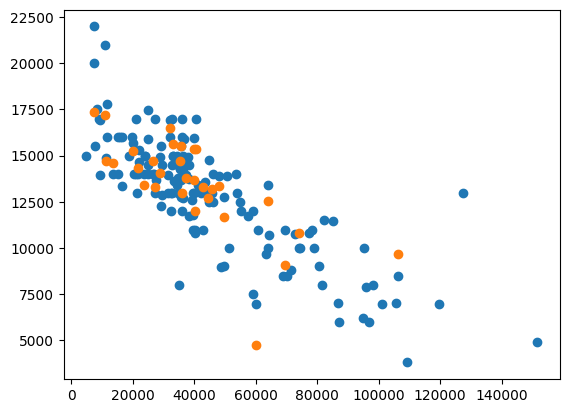

In [49]:
#Drawing the plot
plt.scatter(x='mileage',y='price',data=cars)
plt.scatter(x=X_test.mileage,y=y_predict)
plt.show()